# Introducción al aprendizaje por refuerzos - LAB 1

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2019

## Alumna: María Lucía Pappaterra

## Actividades

1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

4. (Opcional) Implementar política de exploración Softmax, dada por $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$



Para dejar el lab listo para su corrección, dejar link a repo de github con un notebook ejecutando el agente en la planilla enviada en Slack.

### Respuestas:

In [12]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import itertools
import gym
import numpy as np
from agents.utils.plotting import plot_reward_per_episode, plot_steps_per_episode
from agents.utils.plotting import plot_steps_per_episode_smooth, draw_value_matrix

El agente se mueve a través de una grilla 4x12, con estados enumerados de la siguiente forma:
 
$$
  \left[ {\begin{array}{cccccccccccc}
   0 &  1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 \\
   12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 \\
   24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35\\
   36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47\\
  \end{array} } \right]$$
 
Al principio de cada episodio, el estado 36 es el inicial. El estado 47 es el único estado terminal.

El acantilado (cliff) se corresponde con los estados 37 hasta el 46.

El agente tiene 4 acciones potenciales:

* UP = 0

* RIGHT = 1

* DOWN = 2

* LEFT = 3

Por lo tanto: $S = \{0,1,...,47\}$, $A = \{0,1,2,3\}$

In [20]:
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
states = range(env.observation_space.n)

print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In [13]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

1. 

#### SARSA (State-Action-Reward-State-Action)

In [14]:
def learn_SARSA(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """    
    # TODO - your code goes here    
    
    q_next = q.get((next_state, next_action), 0.0)
    q[(state, action)] += alpha*(reward + gamma*q_next - q[(state, action)]) 
        
    pass

In [15]:
def run_SARSA():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        #action = random_state.choice(actions)
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            #next_action = random_state.choice(actions)
            next_action = choose_action(next_state)

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_SARSA(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_SARSA(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [16]:
# definimos sus híper-parámetros básicos
alpha = 0.5
gamma = 1
epsilon = 0.1

episodes_to_run = 500

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

# inicializamos q
q = {}
for s in states:
    for a in actions:
        q[(s,a)] = 0

In [17]:
avg_steps_per_episode, timesteps_ep, reward_ep = run_SARSA()

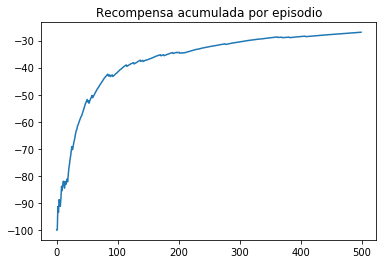

In [7]:
plot_reward_per_episode(reward_ep)

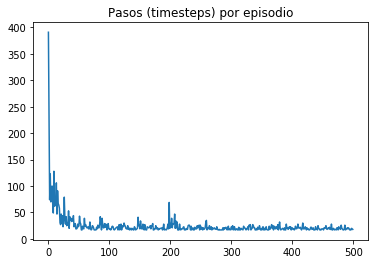

In [8]:
plot_steps_per_episode(timesteps_ep)

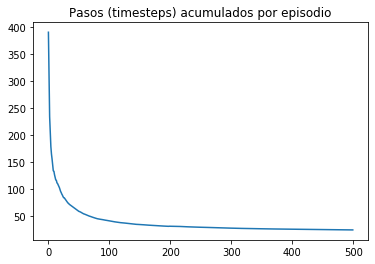

In [9]:
plot_steps_per_episode_smooth(timesteps_ep)

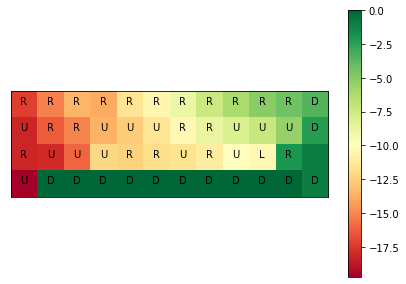


 Matriz de mejor acción-valor (en números): 

 [[-17.23954428 -15.14316652 -13.47940719 -13.86734791 -11.50591433
  -10.42824021  -8.92910114  -7.36906975  -6.09772006  -5.02260286
   -4.246717    -3.48743802]
 [-18.17688817 -16.29163152 -15.09887514 -13.57191616 -12.57200446
  -11.46204211 -10.28051994  -8.75636874  -8.02140089  -7.17268501
   -5.41325753  -2.24362335]
 [-18.16818774 -17.96726471 -16.02741607 -12.12753358 -12.36502775
  -11.94064567 -11.56233996 -10.96253903  -9.96154144 -10.28531687
   -2.00258599  -1.        ]
 [-19.72790699   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]


In [10]:
draw_value_matrix(q)

In [11]:
env.close()

2. 

#### Q-Learning

In [12]:
def learn_Q(state, action, reward, next_state):
    """
    Performs a Q-Learning update for a given state transition
    """

    max_q_next = max([q.get((next_state, a), 0.0) for a in actions])    
    q[(state, action)] += alpha*(reward + gamma*max_q_next - q[(state, action)]) 
        
    pass

In [13]:
# definimos sus híper-parámetros básicos
alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
states = range(env.observation_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

# inicializamos q
q = {}
for s in states:
    for a in actions:
        q[(s,a)] = 0

In [14]:
def run_Q():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        #action = random_state.choice(actions)
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            #next_action = random_state.choice(actions)
            next_action = choose_action(next_state)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_Q(state, action, reward, next_state)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_Q(state, action, reward, next_state)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [15]:
avg_steps_per_episode, timesteps_ep, reward_ep = run_Q()

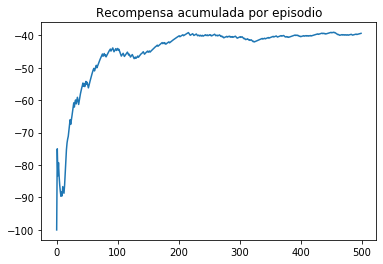

In [16]:
plot_reward_per_episode(reward_ep)

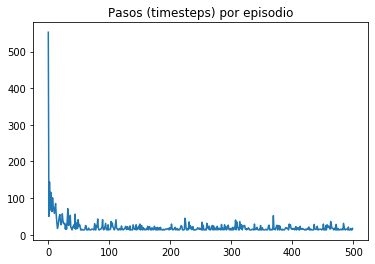

In [17]:
plot_steps_per_episode(timesteps_ep)

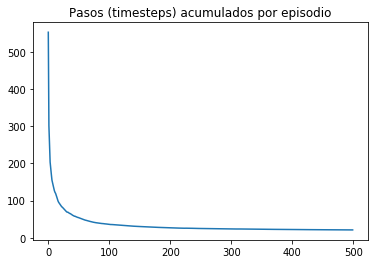

In [18]:
plot_steps_per_episode_smooth(timesteps_ep)

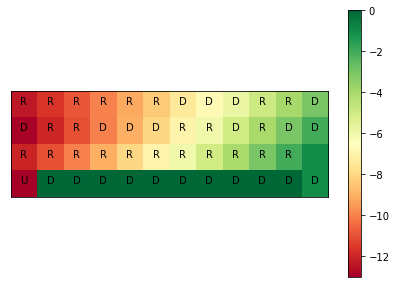


 Matriz de mejor acción-valor (en números): 

 [[-12.3189387  -11.59140422 -10.84866451  -9.96310256  -9.18688713
   -8.34095048  -7.4542462   -6.72926453  -5.82792094  -4.91990551
   -3.95712468  -2.99947958]
 [-12.87149892 -11.96404923 -10.98713428  -9.99742173  -8.99937844
   -7.99976186  -6.99991029  -5.99997592  -4.99999754  -3.99999928
   -2.99999988  -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]


In [19]:
draw_value_matrix(q)

In [20]:
env.close()

#### SARSA vs Q-learning

La diferencia está en la forma en que se encuentra la recompensa futura.

En SARSA, el agente comienza en el estado 1, realiza la acción 1 y obtiene una recompensa (recompensa 1). Ahora, está en el estado 2 y realiza otra acción (acción 2) y obtiene la recompensa de este estado (recompensa 2), antes regresa y actualiza el valor de la acción 1 realizada en el estado 1.

Por otro lado, en Q-learning el agente comienza en el estado 1, realiza la acción 1 y obtiene una recompensa (recompensa 1), y luego mira y ve cuál es la recompensa máxima posible para una acción en el estado 2, y la usa para actualizar el valor de realizar la acción 1 en el estado 1.

Entonces, la recompenza futura en Q-learning es simplemente la acción más alta posible que se puede tomar desde el estado 2, mientras que en SARSA es el valor de la acción real que se tomó.

Esto significa que SARSA toma en cuenta la política de control por la cual el agente se está moviendo e incorpora eso en su actualización de los valores de acción, mientras Q-learning simplemente asume que se está siguiendo una política óptima.

En los resultados anteriores SARSA dio mejores resultados que Q-learning. 

Esto se debe a que Q-learning supone que se está siguiendo la estrategia de control óptima, por lo que los valores de acción convergerán de tal manera que el mejor camino sea por el borde del acantilado. Sin embargo, también existe la posibilidad de que se elija alguna acción aleatoria (este es el mecanismo de exploración incorporado del agente), por lo que el agente puede caer por el acantilado. 

Sin embargo, si la estrategia de control real del agente se tiene en cuenta al aprender, sucede algo muy diferente. El agente ha aprendido que de vez en cuando hace cosas peligrosas, por lo que el mejor camino no es correr a lo largo del borde del acantilado, sino alejarse del acantilado y luego avanzar de manera segura. En consecuencia, incluso si se elige una acción aleatoria, hay pocas posibilidades de que resulte en la muerte. Esto es lo que hace SARSA.

 



3. ### Parámetros


* **alpha** es el 'learning rate', es decir el tamaño del paso de actualización. 

* **gamma** es la tasa de descuento, debe ser un valor entre 0 y 1 inclusive (valor predeterminado: 1). 

* **epsilon** es la probabilidad de elegir una acción aleatoria (este es el mecanismo de exploración del agente). 

Exploraremos los siguientes parámetros:

In [21]:
alphas = [0.25, 0.5, 0.75]
gammas = [0.1, 0.5, 1]
epsilons = [0.01, 0.1, 0.2]

En la siguiente celda probamos todos los modelos de **Q-Learning** posibles con esa convinación de parámetros.

Del análisis de los mismos puede verse que:

* Si alpha es bajo se actualiza lentamente (puede necesitar más números de episodios que un alpha más alto).

* Para gamma bajo las recompensas futuras importan poco (busca recompensa inmediata).

* Para epsilon bajo los algoritmos SARSA y Q-Learning son casi el mismo.

MODELO N°1
alpha=0.25, gamma=0.1, epsilon=0.01


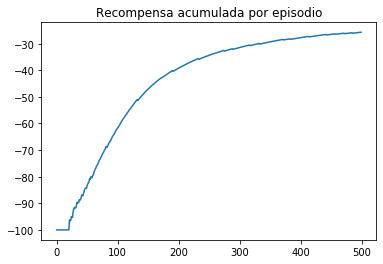

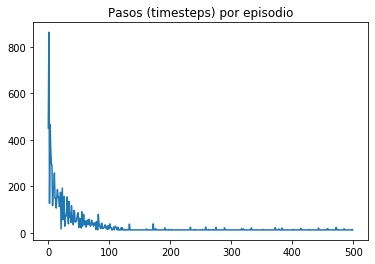

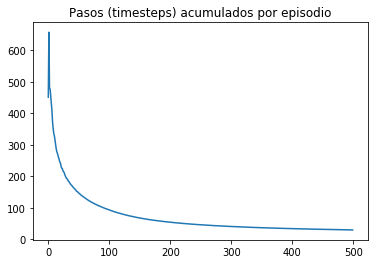

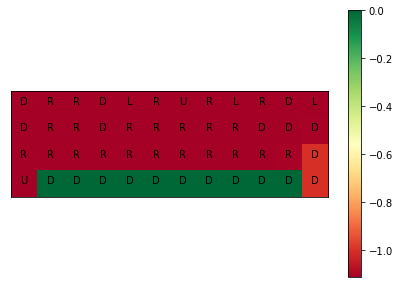


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.11111106
  -1.1111108  -1.11110912 -1.11109912 -1.1110412  -1.11068612 -1.1092313 ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.11111106
  -1.1111107  -1.11110797 -1.11108687 -1.110939   -1.1098077  -1.09997195]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°2
alpha=0.25, gamma=0.1, epsilon=0.1


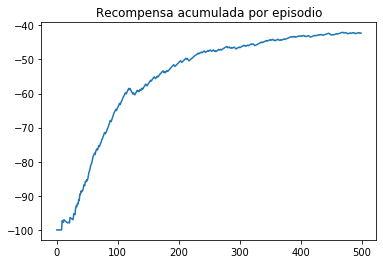

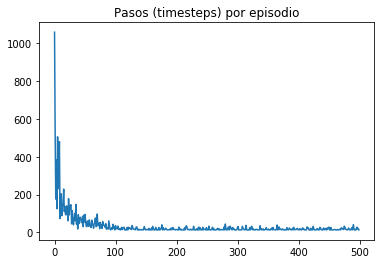

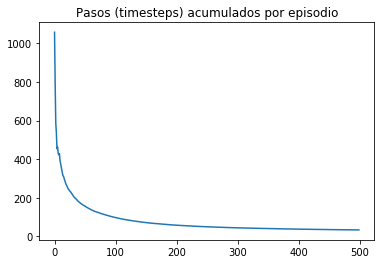

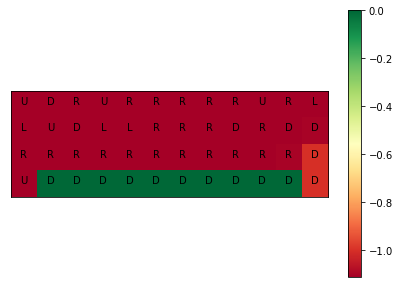


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111109
  -1.111111   -1.11111034 -1.11110568 -1.11107392 -1.11086368 -1.10963288]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111109
  -1.11111097 -1.11110985 -1.11109953 -1.11099882 -1.10999611 -1.09999997]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°3
alpha=0.25, gamma=0.1, epsilon=0.2


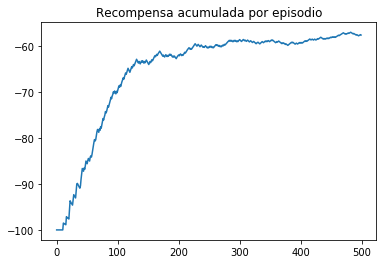

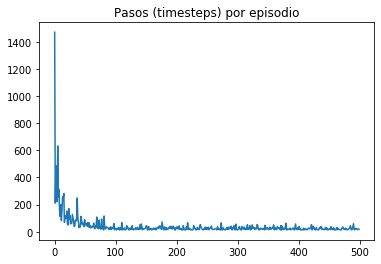

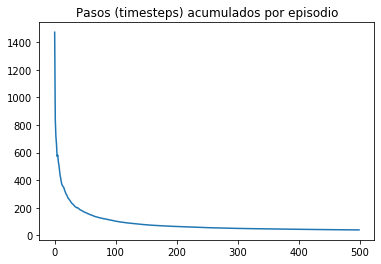

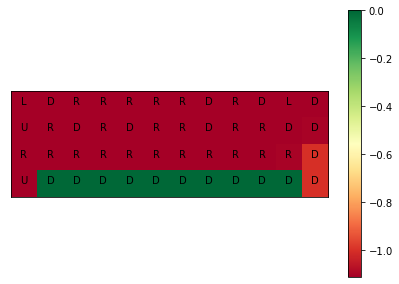


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111
  -1.11111107 -1.11111081 -1.11110895 -1.11109331 -1.11096795 -1.10996821]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.111111   -1.11111    -1.1111     -1.111      -1.10999999 -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°4
alpha=0.25, gamma=0.5, epsilon=0.01


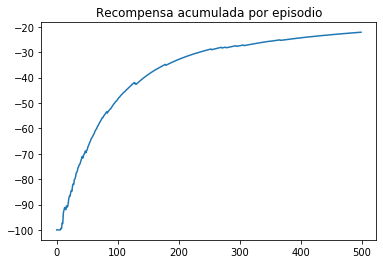

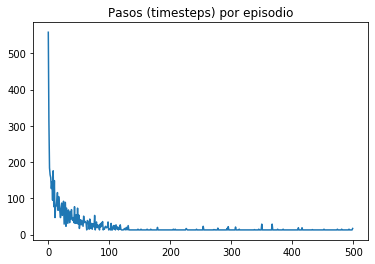

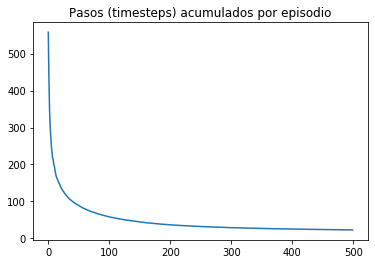

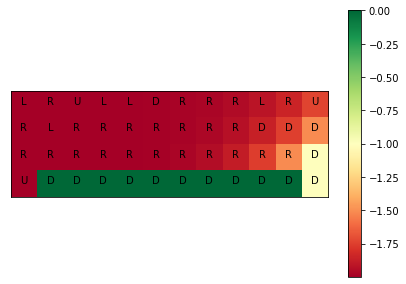


 Matriz de mejor acción-valor (en números): 

 [[-1.99902716 -1.99861949 -1.99776598 -1.9963743  -1.9939813  -1.98963238
  -1.98194979 -1.96900829 -1.94534355 -1.90610007 -1.84479984 -1.73114437]
 [-1.99928776 -1.99880207 -1.99807365 -1.99651401 -1.99370722 -1.98852409
  -1.97919321 -1.96128724 -1.9283221  -1.86640898 -1.74433133 -1.49984223]
 [-1.99951172 -1.99902344 -1.99804687 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°5
alpha=0.25, gamma=0.5, epsilon=0.1


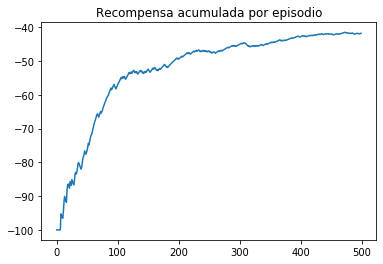

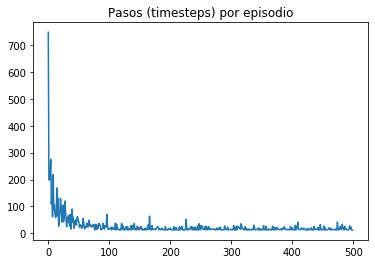

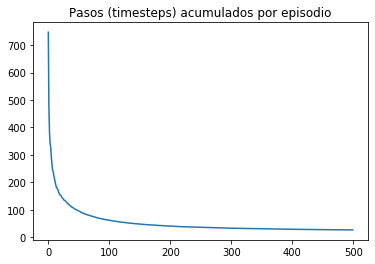

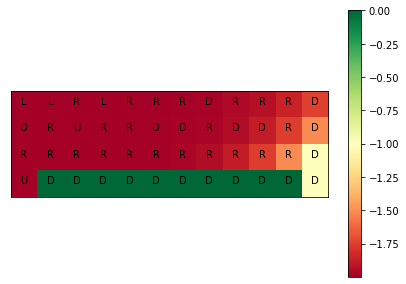


 Matriz de mejor acción-valor (en números): 

 [[-1.99937666 -1.99909733 -1.99848249 -1.99754206 -1.99573824 -1.99238546
  -1.9863633  -1.97633379 -1.95711361 -1.92316642 -1.85760666 -1.74573751]
 [-1.99955098 -1.99929586 -1.99875135 -1.99778123 -1.99581142 -1.99188866
  -1.98406256 -1.96856698 -1.93735506 -1.87489149 -1.74996259 -1.4999999 ]
 [-1.99951172 -1.99902344 -1.99804687 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°6
alpha=0.25, gamma=0.5, epsilon=0.2


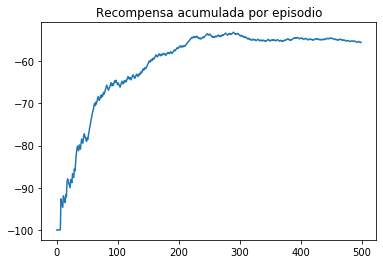

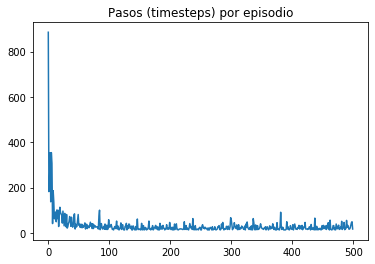

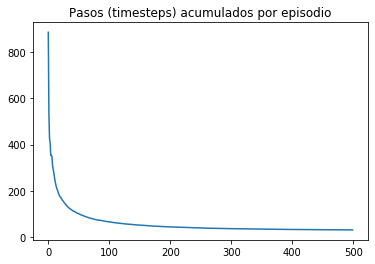

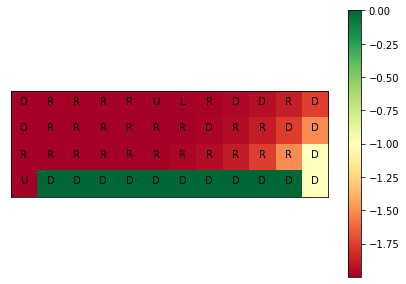


 Matriz de mejor acción-valor (en números): 

 [[-1.99965239 -1.99946954 -1.99907676 -1.99836554 -1.99700694 -1.99447308
  -1.98974226 -1.98114206 -1.96468586 -1.93217208 -1.87098654 -1.74906451]
 [-1.99974337 -1.99950896 -1.99902141 -1.99804505 -1.99609209 -1.99218607
  -1.98437353 -1.96874859 -1.93749907 -1.87499967 -1.74999986 -1.5       ]
 [-1.99951172 -1.99902344 -1.99804687 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°7
alpha=0.25, gamma=1, epsilon=0.01


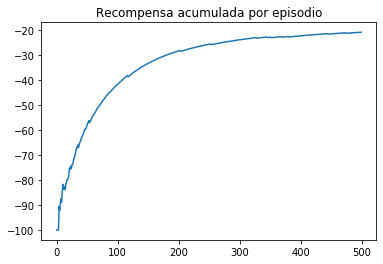

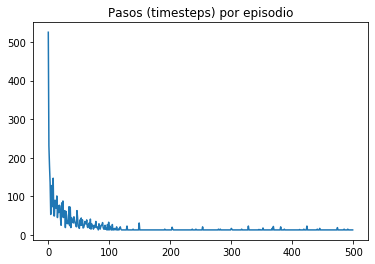

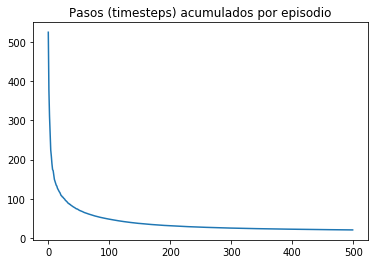

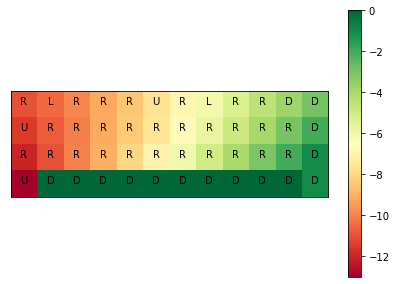


 Matriz de mejor acción-valor (en números): 

 [[-10.9661958  -10.49430943  -9.89513114  -9.18971186  -8.45769529
   -7.6538198   -6.85822899  -6.05638512  -5.29172958  -4.49402405
   -3.72027543  -2.93505698]
 [-11.46594285 -10.72538819 -10.03819694  -9.17474441  -8.37085889
   -7.52809773  -6.6740477   -5.78497236  -4.85491223  -3.92466303
   -2.9741302   -1.99968823]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°8
alpha=0.25, gamma=1, epsilon=0.1


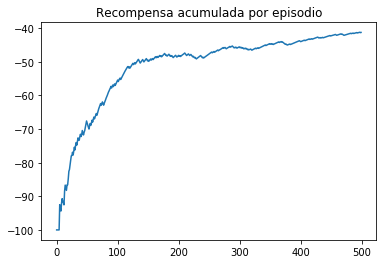

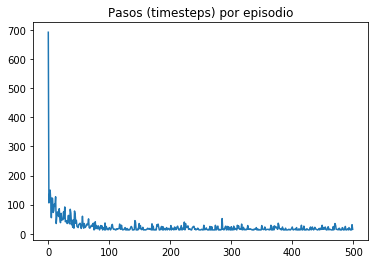

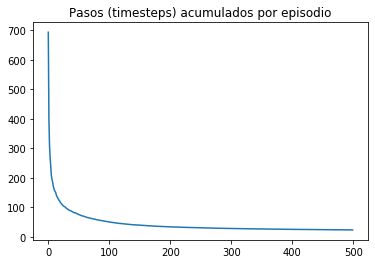

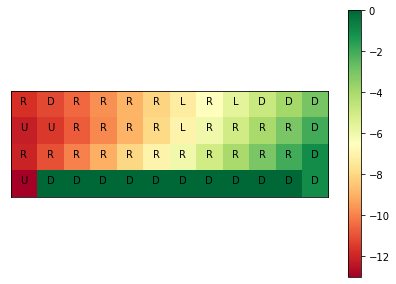


 Matriz de mejor acción-valor (en números): 

 [[-11.69475885 -11.15566706 -10.4731805   -9.68533087  -8.92637405
   -8.09552655  -7.21687543  -6.4611053   -5.59475322  -4.78436126
   -3.90186473  -2.99034719]
 [-12.17748205 -11.50446635 -10.73412172  -9.82511913  -8.90867798
   -7.96185926  -6.97783905  -5.99221939  -4.99747657  -3.99872052
   -2.99981915  -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°9
alpha=0.25, gamma=1, epsilon=0.2


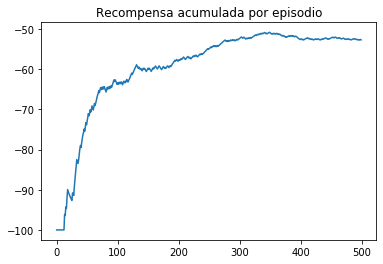

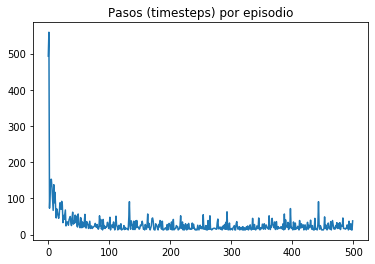

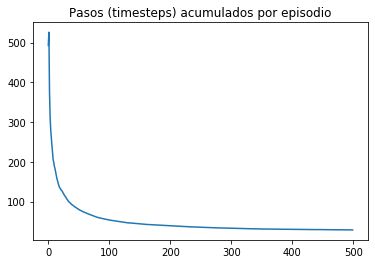

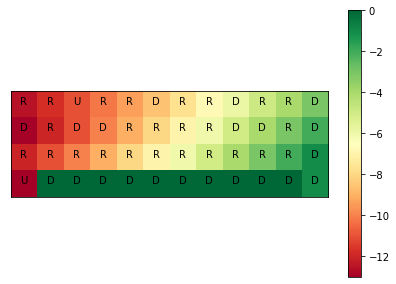


 Matriz de mejor acción-valor (en números): 

 [[-12.48093984 -11.7803217  -10.9737017  -10.19048012  -9.37315145
   -8.53841102  -7.674757    -6.75146407  -5.83997545  -4.92218959
   -3.9657508   -2.99658174]
 [-12.93988057 -11.98404831 -10.99501502  -9.99824843  -8.99921836
   -7.99953056  -6.99982341  -5.99993599  -4.99997683  -3.9999942
   -2.99999941  -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°10
alpha=0.5, gamma=0.1, epsilon=0.01


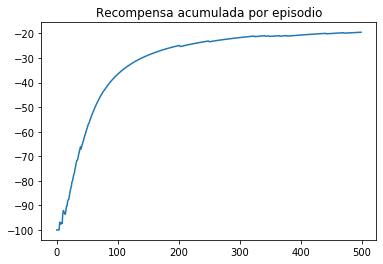

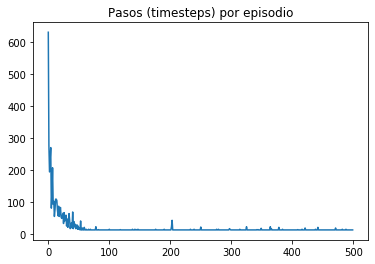

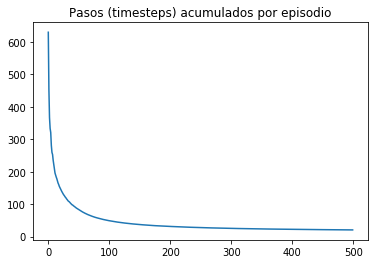

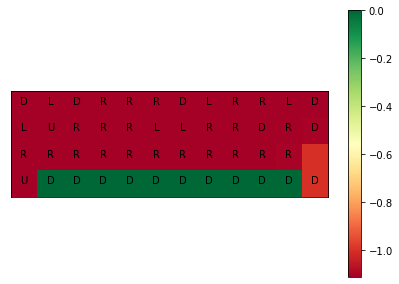


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111108
  -1.11111087 -1.11110975 -1.11110299 -1.11105183 -1.11085283 -1.10974706]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111107
  -1.11111078 -1.11110905 -1.11109301 -1.11096603 -1.10995468 -1.09999757]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°11
alpha=0.5, gamma=0.1, epsilon=0.1


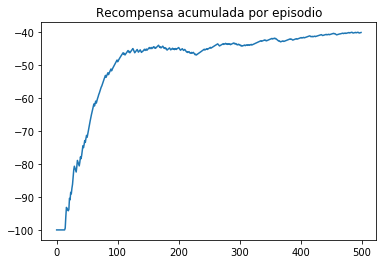

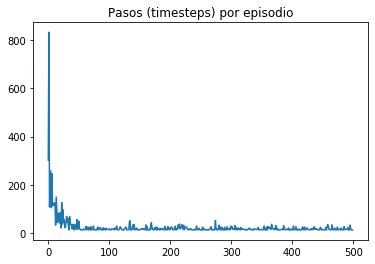

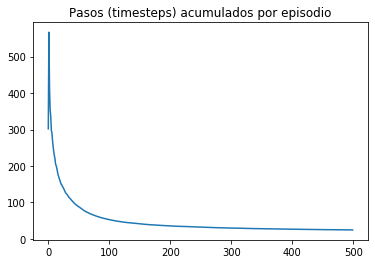

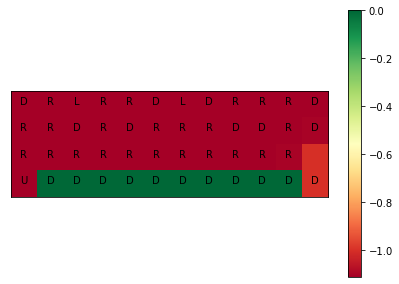


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.11111106 -1.11111077 -1.11110876 -1.11109241 -1.11095284 -1.10999256]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.111111   -1.11111    -1.1111     -1.111      -1.11       -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°12
alpha=0.5, gamma=0.1, epsilon=0.2


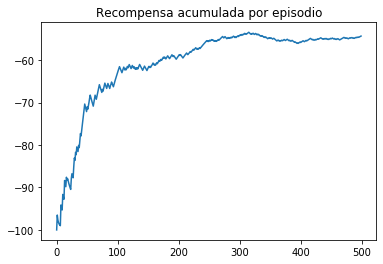

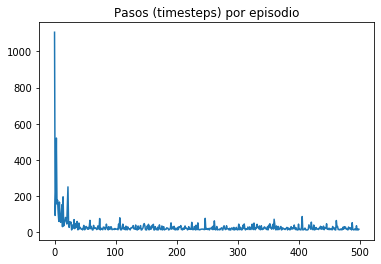

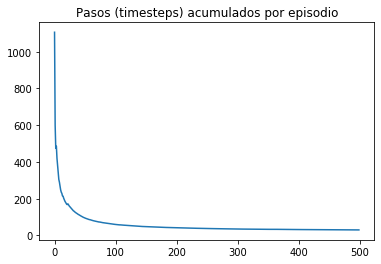

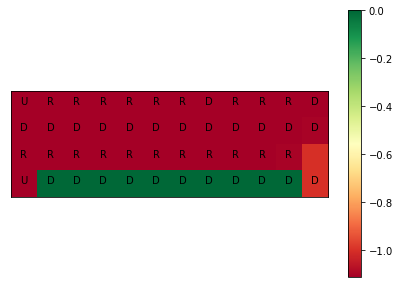


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111
  -1.1111111  -1.11111097 -1.1111099  -1.11109952 -1.11099855 -1.10999951]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.111111   -1.11111    -1.1111     -1.111      -1.11       -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°13
alpha=0.5, gamma=0.5, epsilon=0.01


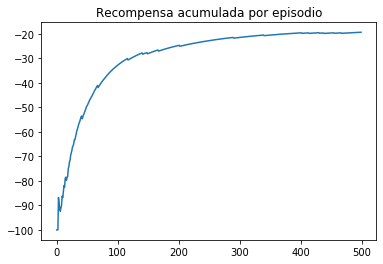

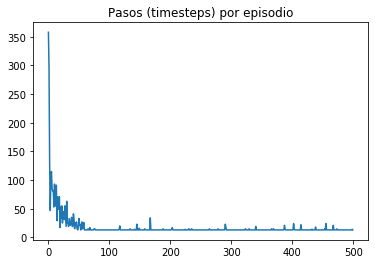

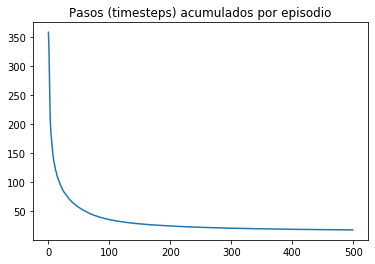

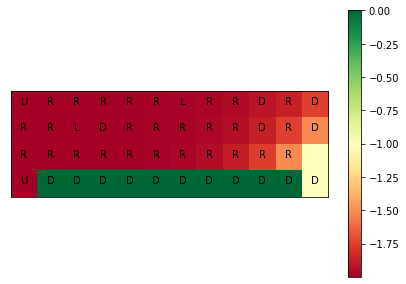


 Matriz de mejor acción-valor (en números): 

 [[-1.99904237 -1.99881329 -1.99803403 -1.99671268 -1.99435766 -1.99075132
  -1.98401868 -1.972439   -1.95097181 -1.91317607 -1.86029447 -1.74347038]
 [-1.99935657 -1.99887671 -1.99805218 -1.99681477 -1.99455591 -1.99001781
  -1.98102325 -1.96603158 -1.93434676 -1.87140515 -1.74908004 -1.49999875]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°14
alpha=0.5, gamma=0.5, epsilon=0.1


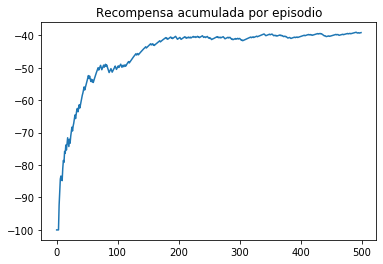

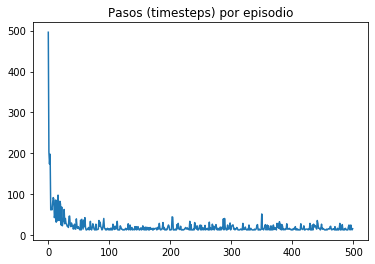

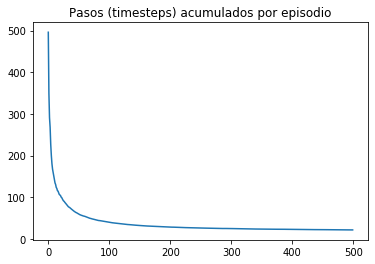

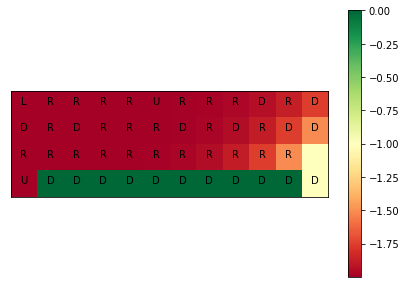


 Matriz de mejor acción-valor (en números): 

 [[-1.99961278 -1.99936563 -1.99885444 -1.99799386 -1.99650329 -1.99366109
  -1.98852526 -1.9788514  -1.96185818 -1.93103943 -1.87169664 -1.74984582]
 [-1.99969813 -1.99946893 -1.99899864 -1.99803099 -1.99608489 -1.99218431
  -1.98437266 -1.96874967 -1.93749983 -1.87499983 -1.74999998 -1.5       ]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°15
alpha=0.5, gamma=0.5, epsilon=0.2


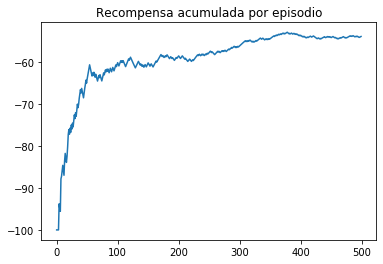

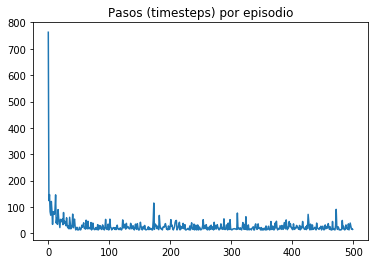

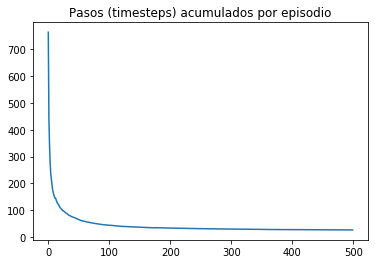

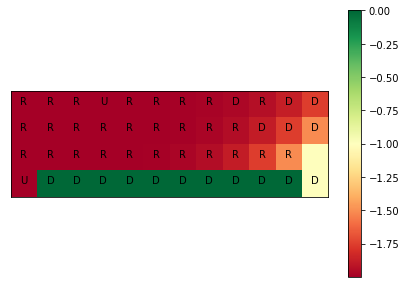


 Matriz de mejor acción-valor (en números): 

 [[-1.99968476 -1.99949955 -1.99925745 -1.99880526 -1.99776302 -1.99572258
  -1.99186484 -1.98402782 -1.96832352 -1.93702455 -1.8747541  -1.74998318]
 [-1.99975586 -1.99951172 -1.99902344 -1.99804687 -1.99609375 -1.9921875
  -1.984375   -1.96875    -1.9375     -1.875      -1.75       -1.5       ]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°16
alpha=0.5, gamma=1, epsilon=0.01


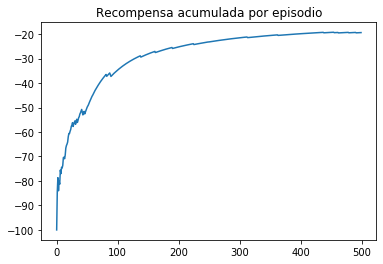

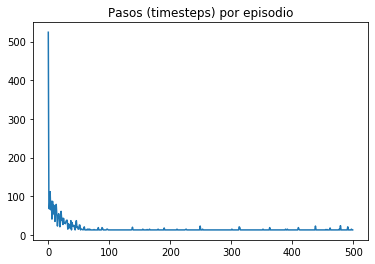

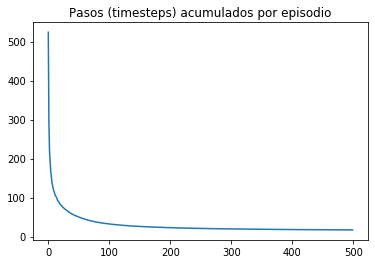

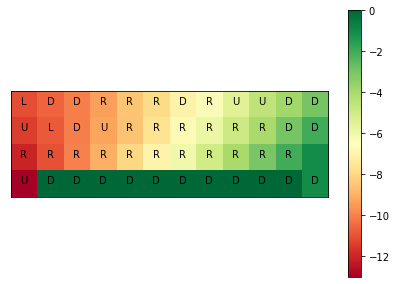


 Matriz de mejor acción-valor (en números): 

 [[-11.02656869 -10.59618874 -10.04554463  -9.35188927  -8.50772774
   -7.89972702  -7.04344954  -6.32524943  -5.43481445  -4.5637207
   -3.82283768  -2.97937566]
 [-11.40627353 -10.79134243 -10.04031218  -9.27093466  -8.54827294
   -7.65500887  -6.72761693  -5.86212951  -4.92091035  -3.97664107
   -2.9924854   -1.99998726]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°17
alpha=0.5, gamma=1, epsilon=0.1


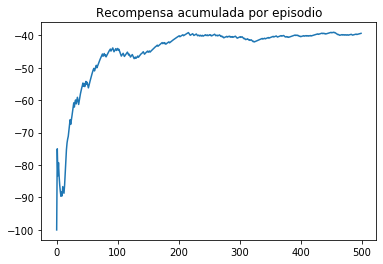

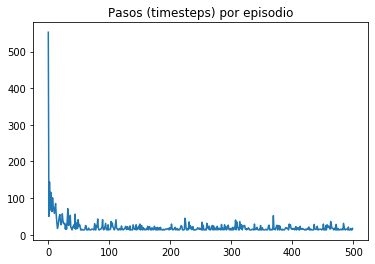

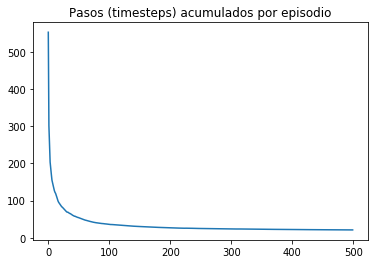

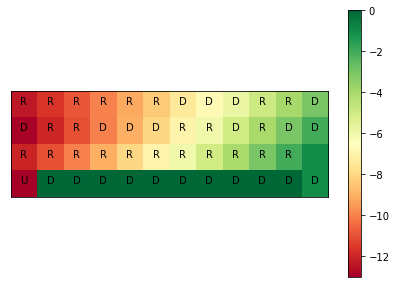


 Matriz de mejor acción-valor (en números): 

 [[-12.3189387  -11.59140422 -10.84866451  -9.96310256  -9.18688713
   -8.34095048  -7.4542462   -6.72926453  -5.82792094  -4.91990551
   -3.95712468  -2.99947958]
 [-12.87149892 -11.96404923 -10.98713428  -9.99742173  -8.99937844
   -7.99976186  -6.99991029  -5.99997592  -4.99999754  -3.99999928
   -2.99999988  -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°18
alpha=0.5, gamma=1, epsilon=0.2


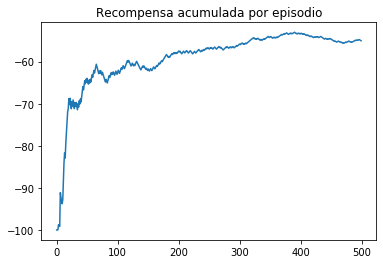

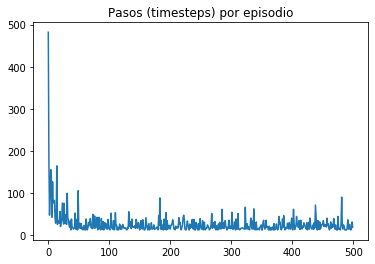

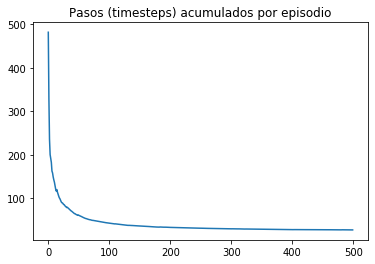

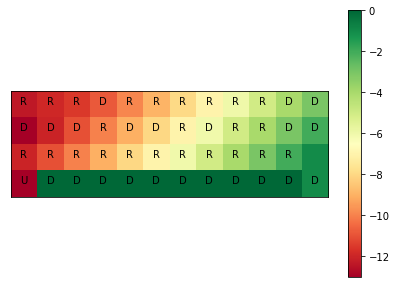


 Matriz de mejor acción-valor (en números): 

 [[-12.32547123 -11.92362482 -11.49139553 -10.79847216  -9.89802814
   -8.92709551  -7.95551759  -6.97031653  -5.98544974  -4.9921242
   -3.99713326  -2.99994833]
 [-12.9999977  -11.99999972 -10.99999998  -9.99999999  -9.
   -8.          -7.          -6.          -5.          -4.
   -3.          -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°19
alpha=0.75, gamma=0.1, epsilon=0.01


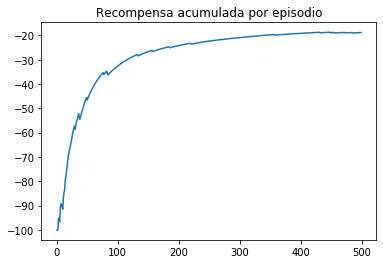

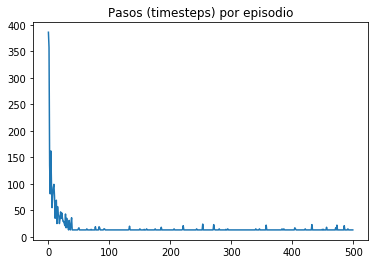

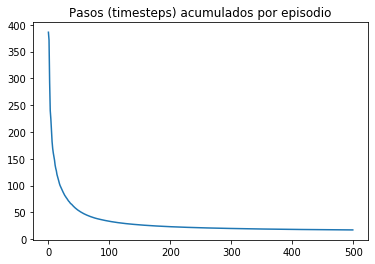

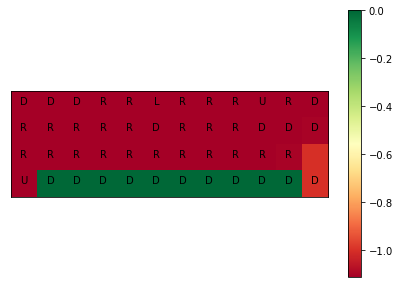


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111109
  -1.11111095 -1.11111    -1.11110562 -1.11106271 -1.11095023 -1.10996003]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111108
  -1.11111088 -1.11110946 -1.11109781 -1.11098609 -1.10999796 -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°20
alpha=0.75, gamma=0.1, epsilon=0.1


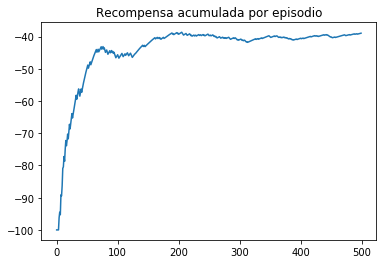

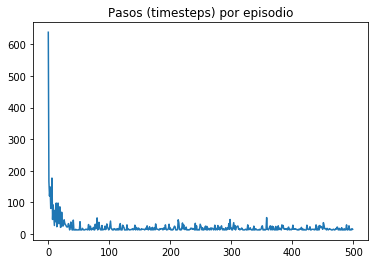

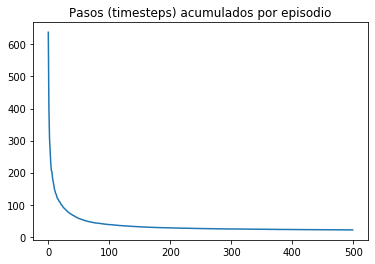

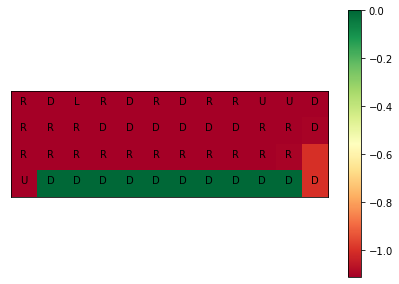


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111
  -1.11111108 -1.11111086 -1.11110902 -1.11109414 -1.11097794 -1.10999953]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.111111   -1.11111    -1.1111     -1.111      -1.11       -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°21
alpha=0.75, gamma=0.1, epsilon=0.2


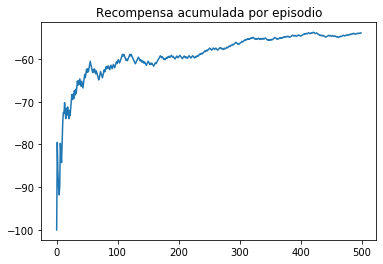

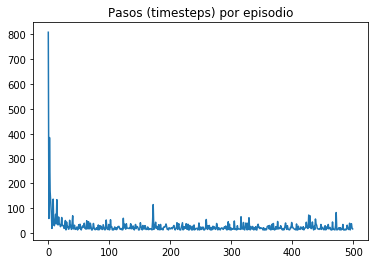

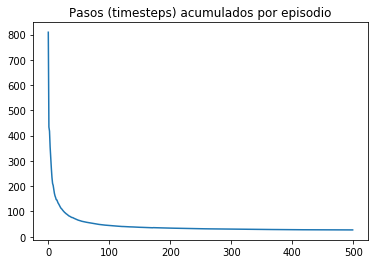

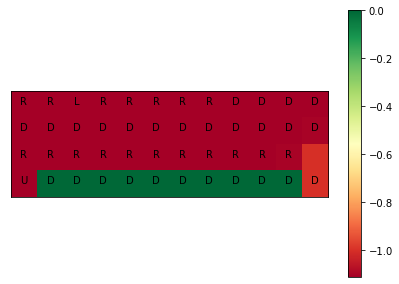


 Matriz de mejor acción-valor (en números): 

 [[-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111
  -1.1111111  -1.111111   -1.11111    -1.11109999 -1.11099999 -1.11      ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111
  -1.111111   -1.11111    -1.1111     -1.111      -1.11       -1.1       ]
 [-1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.1111111  -1.111111
  -1.11111    -1.1111     -1.111      -1.11       -1.1        -1.        ]
 [-1.11111111  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°22
alpha=0.75, gamma=0.5, epsilon=0.01


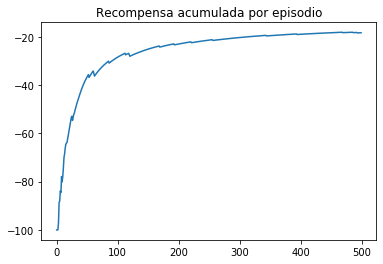

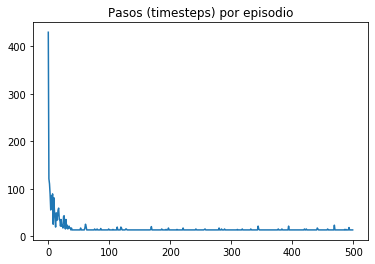

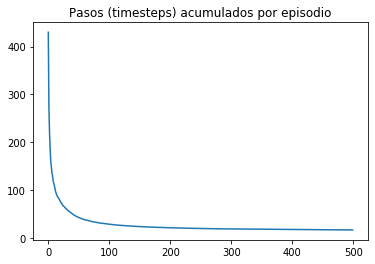

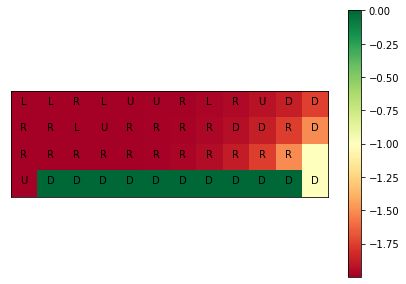


 Matriz de mejor acción-valor (en números): 

 [[-1.9988245  -1.99857717 -1.9979498  -1.99647588 -1.99402205 -1.99146361
  -1.98440455 -1.97209953 -1.95486748 -1.91673231 -1.86828697 -1.74938763]
 [-1.99922911 -1.99891108 -1.99808004 -1.99731852 -1.9953485  -1.99111341
  -1.98316205 -1.9676027  -1.93635864 -1.87457684 -1.74980148 -1.5       ]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°23
alpha=0.75, gamma=0.5, epsilon=0.1


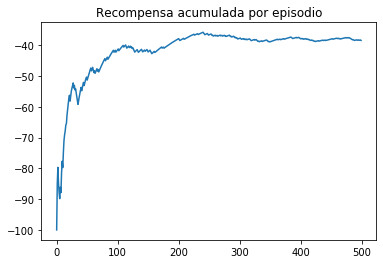

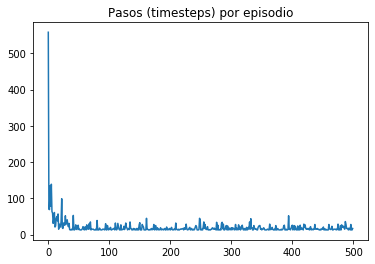

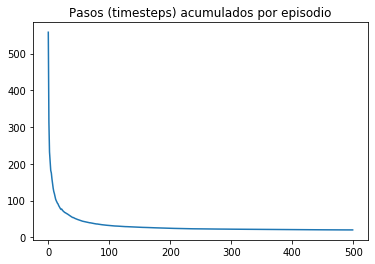

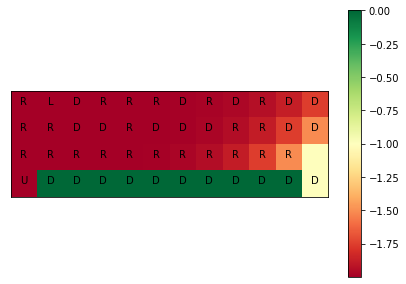


 Matriz de mejor acción-valor (en números): 

 [[-1.9996585  -1.99938042 -1.99916342 -1.99865343 -1.9975389  -1.99542505
  -1.99121122 -1.98301093 -1.96695983 -1.93663132 -1.87419658 -1.74999289]
 [-1.99975525 -1.99951143 -1.99902334 -1.99804687 -1.99609375 -1.9921875
  -1.984375   -1.96875    -1.9375     -1.875      -1.75       -1.5       ]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°24
alpha=0.75, gamma=0.5, epsilon=0.2


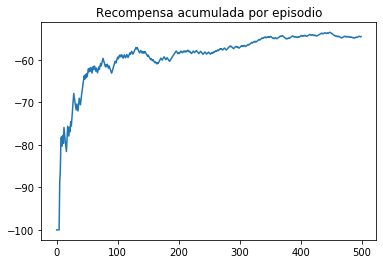

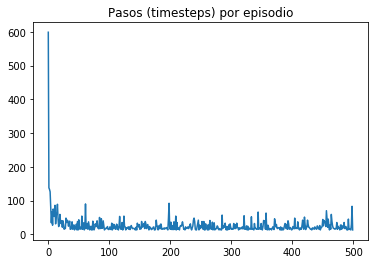

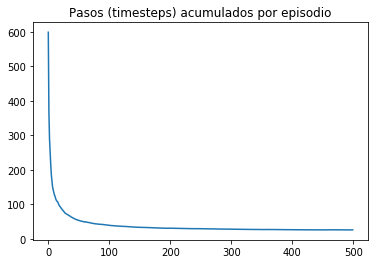

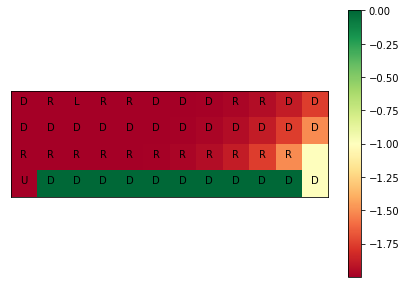


 Matriz de mejor acción-valor (en números): 

 [[-1.99960089 -1.99954229 -1.99930374 -1.99899792 -1.99803341 -1.99608092
  -1.99218409 -1.98437238 -1.96874734 -1.93749803 -1.87499926 -1.74999995]
 [-1.99975586 -1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875
  -1.984375   -1.96875    -1.9375     -1.875      -1.75       -1.5       ]
 [-1.99951172 -1.99902344 -1.99804688 -1.99609375 -1.9921875  -1.984375
  -1.96875    -1.9375     -1.875      -1.75       -1.5        -1.        ]
 [-1.99975586  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°25
alpha=0.75, gamma=1, epsilon=0.01


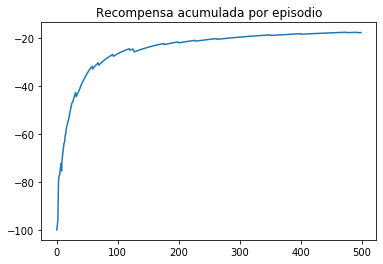

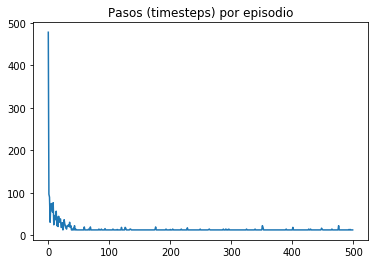

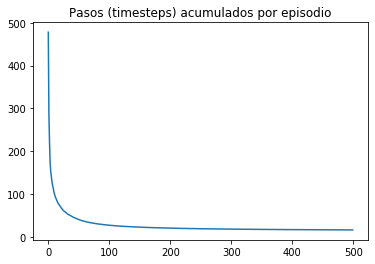

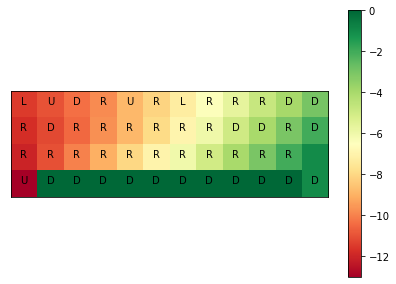


 Matriz de mejor acción-valor (en números): 

 [[-11.4610749  -10.93292375 -10.35583313  -9.79467106  -8.82658773
   -8.11437054  -7.25966449  -6.4260456   -5.63903164  -4.74588507
   -3.94168427  -2.99593258]
 [-11.73492539 -11.14325381 -10.50649422  -9.68821786  -8.82566019
   -7.90803582  -6.95136497  -5.96349613  -4.97654202  -3.99463024
   -2.99951896  -1.99999999]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°26
alpha=0.75, gamma=1, epsilon=0.1


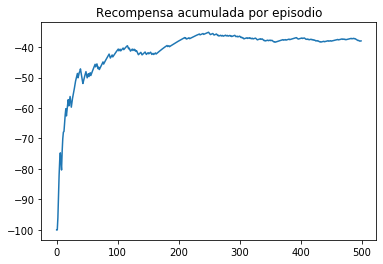

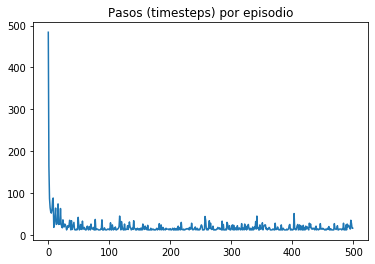

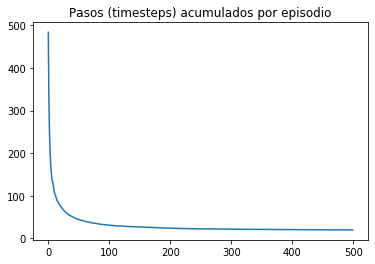

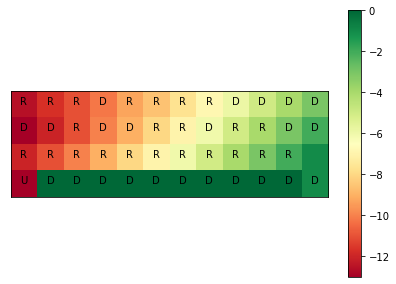


 Matriz de mejor acción-valor (en números): 

 [[-12.50631188 -11.6805686  -11.00812122 -10.1704139   -9.2790138
   -8.55960777  -7.63916561  -6.80827272  -5.84070571  -4.95535785
   -3.9935411   -2.99999136]
 [-12.9987094  -11.99997157 -10.99999787  -9.99999932  -8.99999995
   -7.99999999  -7.          -6.          -5.          -4.
   -3.          -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------
MODELO N°27
alpha=0.75, gamma=1, epsilon=0.2


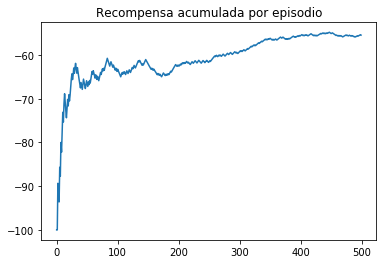

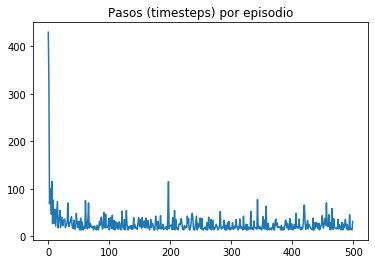

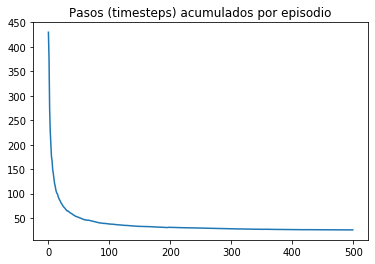

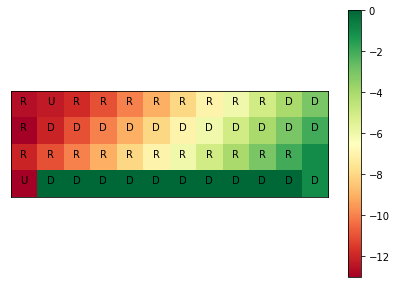


 Matriz de mejor acción-valor (en números): 

 [[-12.55018363 -12.23992826 -11.83408343 -10.97182877  -9.99381138
   -8.99738229  -7.99904891  -6.99945712  -5.9998016   -4.99989048
   -3.99997758  -2.99999997]
 [-13.         -12.         -11.         -10.          -9.
   -8.          -7.          -6.          -5.          -4.
   -3.          -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]
-----------------------------------------------------------------------------------------


In [23]:
i = 1

for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
        
            print("MODELO N°{}".format(i))
            i += 1
    
            print("alpha={}, gamma={}, epsilon={}".format(alpha, gamma, epsilon))
    
            env = gym.make("CliffWalking-v0")
            actions = range(env.action_space.n)
            states = range(env.observation_space.n)

            # se declara una semilla aleatoria
            random_state = np.random.RandomState(42)
    
            # inicializamos q
            q = {}
            for s in states:
                for a in actions:
                    q[(s,a)] = 0
            
            avg_steps_per_episode, timesteps_ep, reward_ep = run_Q()
    
            plot_reward_per_episode(reward_ep)
            plot_steps_per_episode(timesteps_ep)
            plot_steps_per_episode_smooth(timesteps_ep)
            draw_value_matrix(q)
            print("-----------------------------------------------------------------------------------------")
            env.close()

El modelo que arroja los mejores resultados es el N°10 con los parámetros: alpha=0.5, gamma=0.1, epsilon=0.01. Puede verse que la curva de *Recompensa acumulada por episodio* es la más suave (con menos picos), y alcanza un valor de recompensa de -20 (alto en comparación con los otros modelos). La curva de *Pasos por episodio* tiene pocos picos a medida que aumentan los episodios.

Además, teniendo en cuenta que la política óptima de este juego es la siguiente:

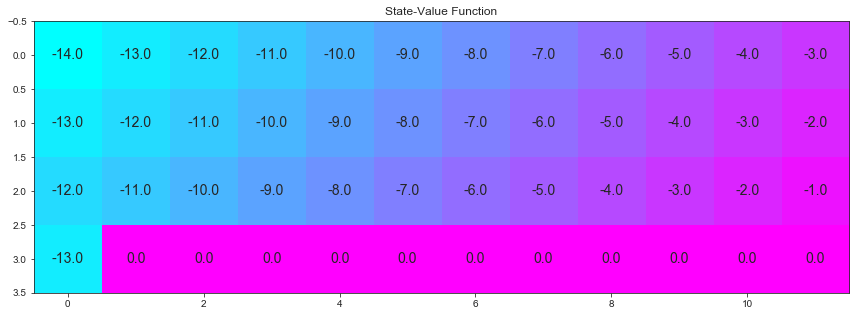

In [3]:
from agents.utils.plotting import plot_values

# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

El modelo que más se acerca a dichos resultados es el N°10.